# Strategic Research Copilot - Testing Notebook

This notebook tests the agentic workflow with:
- Planning
- Multi-source retrieval
- Analysis
- Self-critique and looping
- Output generation

In [14]:
import os

# Completely disable LangSmith
os.environ["LANGCHAIN_TRACING_V2"] = "false"
os.environ["LANGCHAIN_TRACING"] = "false"

# Remove any existing keys
for key in ["LANGCHAIN_API_KEY", "LANGSMITH_API_KEY", "LANGCHAIN_PROJECT"]:
    os.environ.pop(key, None)

print("✅ LangSmith disabled")

✅ LangSmith disabled


In [15]:
# Add src to path
import sys
sys.path.insert(0, '../src')

# Load environment
from dotenv import load_dotenv
load_dotenv('../.env')

# Enable LangSmith
import os
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_PROJECT'] = 'research-copilot-dev'
print('✅ Environment configured')

✅ Environment configured


## 1. Test Neo4j Connection

In [3]:
from copilot.graph import graph_connection

if graph_connection.health_check():
    print('✅ Neo4j connected')
    
    # Show some stats
    nodes = graph_connection.query('MATCH (n) RETURN count(n) AS count')[0]['count']
    rels = graph_connection.query('MATCH ()-[r]->() RETURN count(r) AS count')[0]['count']
    print(f'   Nodes: {nodes}')
    print(f'   Relationships: {rels}')
else:
    print('❌ Neo4j connection failed')

✅ Neo4j connected
   Nodes: 600
   Relationships: 609


## 2. Create the Agent

In [4]:
from copilot import create_copilot

copilot = create_copilot()
print('✅ Research Copilot created')

✅ Research Copilot created


## 3. Test Simple Query (Factual)

In [5]:
# Simple factual query - should be quick, minimal looping
query = "What products did Microsoft launch?"
print(f'Query: {query}\n')

result = copilot.research(query)

print('=' * 50)
print(f'Query Type: {result["query_type"]}')
print(f'Strategy: {result["retrieval_strategy"]}')
print(f'Iterations: {result["iteration"]}')
print(f'Quality Score: {result["quality_score"]:.0%}')
print(f'Output Format: {result["output_format"]}')
print('=' * 50)
print()
print('Response:')
print(result['final_response'])

Query: What products did Microsoft launch?



F:\Demo Apps and Projects\graph_rag_mvp\venv\Lib\site-packages\langsmith\client.py:297: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(
Failed to multipart ingest runs: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Unauthorized"}\n')trace=019b2957-069e-7072-8590-fa0ebbfdd762,id=019b2957-069e-7072-8590-fa0ebbfdd762; trace=019b2957-069e-7072-8590-fa0ebbfdd762,id=019b2957-06ee-7d80-bcbf-8286f640caa0
Failed to send compressed multipart ingest: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Unauthorized"}\n')trace=019b2957-069e-7072-8590-fa0ebbfdd762,id=019b2957-0c5c-7702-92ba-c6284e3cc696
Fa

Query Type: factual
Strategy: graph_only
Iterations: 1
Quality Score: 75%
Output Format: chat

Response:
Certainly! Microsoft has launched numerous products across various sectors of digital technology. While the specific launches are not fully detailed in your query, I can highlight some key product categories and notable releases that align with Microsoft's strategic focus on digital technology.

### Key Products Launched by Microsoft:
1. **Windows Operating System**: Continuously updated versions like Windows 10 and Windows 11.
2. **Office Suite (Microsoft 365)**: Includes applications such as Word, Excel, PowerPoint, Outlook, and Teams, now integrated with cloud services for enhanced collaboration.
3. **Azure Cloud Services**: A comprehensive suite of cloud computing services including storage, databases, analytics, virtual machines, and more.
4. **Surface Devices**: A range of tablets, laptops, and 2-in-1 devices designed to integrate seamlessly with Microsoft’s ecosystem.
5. **Xb

## 4. Test Strategic Query (Should trigger more analysis)

In [6]:
# Strategic query - should do more work, possibly loop
query = "How should Microsoft respond to competitive threats in AI?"
print(f'Query: {query}\n')

result = copilot.research(query)

print('=' * 50)
print(f'Query Type: {result["query_type"]}')
print(f'Strategy: {result["retrieval_strategy"]}')
print(f'Iterations: {result["iteration"]}')
print(f'Quality Score: {result["quality_score"]:.0%}')
print(f'Output Format: {result["output_format"]}')
print(f'Entities Found: {len(result.get("entities_found", []))}')
print(f'Insights: {len(result.get("insights", []))}')
print('=' * 50)
print()
print('Response:')
print(result['final_response'])

Query: How should Microsoft respond to competitive threats in AI?



Failed to send compressed multipart ingest: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Unauthorized"}\n')trace=019b2957-069e-7072-8590-fa0ebbfdd762,id=019b2958-3e6a-7192-9fc2-c708082b2570; trace=019b2957-069e-7072-8590-fa0ebbfdd762,id=019b2958-3c07-7621-a33a-07cbd6f1fbb3; trace=019b2957-069e-7072-8590-fa0ebbfdd762,id=019b2958-96a3-7521-b3f8-40b79326c59f; trace=019b2957-069e-7072-8590-fa0ebbfdd762,id=019b2958-96a3-7521-b3f8-40b79326c59f; trace=019b2957-069e-7072-8590-fa0ebbfdd762,id=019b2957-069e-7072-8590-fa0ebbfdd762; trace=019b2958-96ac-7990-b08d-5cf36390b3e8,id=019b2958-96ac-7990-b08d-5cf36390b3e8; trace=019b2958-96ac-7990-b08d-5cf36390b3e8,id=019b2958-96ad-72e3-af59-95bef461c0fa
Failed to send compressed multipart ingest: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langch

Query Type: strategic
Strategy: hybrid
Iterations: 3
Quality Score: 75%
Output Format: slides
Entities Found: 17
Insights: 2

Response:
Here's the presentation structure I've prepared:

**Microsoft's Response to AI Competitive Threats**
_Strategies for Hybrid Work and Digital Technology Leadership_

### Slide 1: Microsoft's Strategic Response to AI Competitors

### Slide 2: Executive Summary
• Microsoft’s focus on hybrid work solutions and digital technologies is well-established.
• There is a need for more targeted strategies to compete against leading AI companies like Google and Amazon.
• Leveraging existing strengths while investing in emerging AI technologies will be key.

### Slide 3: Microsoft's Strategic Focus on Hybrid Work and Digital Technology
• Strategic focus on hybrid work solutions through Microsoft 365 Copilot and Viva.
• Wide range of digital technology offerings including cloud services and AI-driven tools.
• No explicit mention of specific strategies for competing a

## 5. Stream Execution (See Each Step)

In [7]:
# Stream to see each node execute
query = "What are the key risks mentioned in the shareholder letters?"
print(f'Query: {query}\n')
print('Execution trace:')
print('-' * 30)

for event in copilot.stream(query):
    for node_name, update in event.items():
        print(f'\n📍 {node_name.upper()}')
        
        # Show relevant info based on node
        if node_name == 'planner':
            print(f'   Type: {update.get("query_type")}')
            print(f'   Strategy: {update.get("retrieval_strategy")}')
            print(f'   Steps: {len(update.get("research_plan", []))}')
            
        elif node_name == 'retriever':
            print(f'   Graph results: {len(update.get("graph_results", []))}')
            
        elif node_name == 'analyzer':
            print(f'   Entities: {len(update.get("entities_found", []))}')
            print(f'   Insights: {len(update.get("insights", []))}')
            
        elif node_name == 'critic':
            print(f'   Quality: {update.get("quality_score", 0):.0%}')
            print(f'   Needs refinement: {update.get("needs_refinement", False)}')
            
        elif node_name == 'generator':
            print(f'   Content length: {len(update.get("output_content", ""))}')
            
        elif node_name == 'responder':
            print(f'   Response ready!')

print('\n' + '=' * 50)
print('\nFinal Response:')
# Get the response from the last event
print(event.get('responder', {}).get('final_response', 'No response'))

Query: What are the key risks mentioned in the shareholder letters?

Execution trace:
------------------------------


Failed to send compressed multipart ingest: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Unauthorized"}\n')trace=019b2958-96ac-7990-b08d-5cf36390b3e8,id=019b295a-5dbb-7673-86a5-ac23232bb66a; trace=019b2958-96ac-7990-b08d-5cf36390b3e8,id=019b295a-5b00-7881-b094-38e307744581; trace=019b2958-96ac-7990-b08d-5cf36390b3e8,id=019b295a-bcec-7831-84a6-90a6a146c7b7; trace=019b2958-96ac-7990-b08d-5cf36390b3e8,id=019b295a-bcec-7831-84a6-90a6a146c7b7; trace=019b2958-96ac-7990-b08d-5cf36390b3e8,id=019b2958-96ac-7990-b08d-5cf36390b3e8; trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295a-bcfc-7183-9e08-588c78f3b005; trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295a-bcfd-7a70-a82f-011f049da015
Failed to send compressed multipart ingest: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langch


📍 PLANNER
   Type: factual
   Strategy: graph_only
   Steps: 2


Failed to send compressed multipart ingest: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Unauthorized"}\n')trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295a-bfa4-7d63-abfa-2242eb1664ff; trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295a-bcfd-7a70-a82f-011f049da015; trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295a-ed95-7253-a93f-0d8614076136



📍 RETRIEVER
   Graph results: 0

📍 RETRIEVER
   Graph results: 1


Failed to send compressed multipart ingest: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Unauthorized"}\n')trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295a-f0ae-7561-93bd-1a334b7bf836; trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295a-f0ae-7561-93bd-1a334b7bf836; trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295a-ed95-7253-a93f-0d8614076136; trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295a-f0b5-77a3-90df-5628073736a8; trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295a-f11f-78b1-b165-62a01664fecd; trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295a-f11f-78b1-b165-62a01664fecd; trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295a-f0b5-77a3-90df-5628073736a8; trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295a-f120-7d31-9452-1cb91516df5f
Failed to send compressed multipart ingest: la


📍 ANALYZER
   Entities: 0
   Insights: 1


Failed to send compressed multipart ingest: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Unauthorized"}\n')trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295a-f3c4-7cc2-a4d9-09d6d04ea0ae; trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295a-f120-7d31-9452-1cb91516df5f; trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295b-2297-7320-9a30-f77a7cec70a6; trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295b-24bf-7031-a621-ae6d8eabc669



📍 CRITIC
   Quality: 75%
   Needs refinement: False


Failed to send compressed multipart ingest: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Unauthorized"}\n')trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295b-24bf-7031-a621-ae6d8eabc669; trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295b-5628-7ae1-a6da-c009155ab740; trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295b-5628-7ae1-a6da-c009155ab740; trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295b-2297-7320-9a30-f77a7cec70a6; trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295b-5629-7341-aa1d-34f838d60d57
Failed to send compressed multipart ingest: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Unauthorized"}\n')trace=019b295a-


📍 GENERATOR
   Content length: 1660

📍 RESPONDER
   Response ready!


Final Response:
# Key Risks Mentioned in Shareholder Letters

## Key Findings
- Regulatory changes pose significant risks to companies, impacting their operations and financial performance.
- Market competition is a major concern, as it can affect a company's market share and profitability.
- Supply chain disruptions are highlighted as another critical risk, potentially leading to delays and increased costs.

## Details
### Regulatory Changes
- Companies face the risk of new or changing regulations that could alter their business models and operational strategies.
- Compliance with these changes can require substantial financial investments and time, affecting overall performance.

### Market Competition
- Intense competition from both established and emerging players can lead to reduced market share and profitability.
- Companies must continuously innovate and adapt to stay competitive in the marketplace.

### Supp

## 6. Visualize the Graph Structure

Failed to send compressed multipart ingest: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Unauthorized"}\n')trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295b-592e-7f52-90c6-8f068f3e268b; trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295b-5629-7341-aa1d-34f838d60d57; trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295b-9cdf-7181-a238-613f535d09a1; trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295b-9cdf-7181-a238-613f535d09a1; trace=019b295a-bcfc-7183-9e08-588c78f3b005,id=019b295a-bcfc-7183-9e08-588c78f3b005


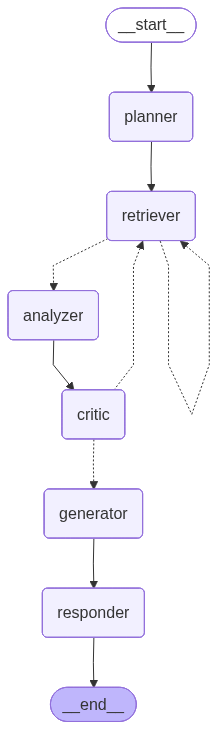

In [8]:
from copilot.agent import build_research_graph

# Build and visualize
workflow = build_research_graph()
compiled = workflow.compile()

# Try to render
try:
    from IPython.display import Image, display
    display(Image(compiled.get_graph().draw_mermaid_png()))
except Exception as e:
    print('Could not render image, showing Mermaid:')
    print(compiled.get_graph().draw_mermaid())

## 7. Test Slide Generation Request

In [9]:
# This should trigger slides output format
query = "Create a presentation about Microsoft's AI strategy"
print(f'Query: {query}\n')

result = copilot.research(query)

print(f'Output Format: {result["output_format"]}')
print(f'Quality: {result["quality_score"]:.0%}')
print()
print('Generated Content:')
print(result['final_response'])

Query: Create a presentation about Microsoft's AI strategy



Failed to send compressed multipart ingest: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Unauthorized"}\n')trace=019b295b-a4c4-7a10-8c78-4dd56de03f4e,id=019b295b-a4c4-7a10-8c78-4dd56de03f4e; trace=019b295b-a4c4-7a10-8c78-4dd56de03f4e,id=019b295b-a4cb-7c33-98e0-3de68e768196
Failed to send compressed multipart ingest: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Unauthorized"}\n')trace=019b295b-a4c4-7a10-8c78-4dd56de03f4e,id=019b295b-a7b7-71f0-add1-3d295762a6fb
Failed to send compressed multipart ingest: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: U

Output Format: slides
Quality: 75%

Generated Content:
Here's the presentation structure I've prepared:

**Microsoft's AI Strategy: Innovating for the Future**
_A Strategic Overview and Recommendations_

### Slide 1: Microsoft's AI Strategy

### Slide 2: Executive Summary
• Microsoft is committed to digital technology and innovation, as seen in its 'Defining What Comes Next' strategy.
• The company's AI efforts are integral to its broader technological vision.
• Key areas of focus include cloud computing, enterprise solutions, and customer experience.

### Slide 3: Strategic Focus on Digital Technology
• Microsoft's core strategy is centered around digital transformation and innovation.
• AI is a critical component of this strategy, driving advancements in various sectors like healthcare, finance, and education.

### Slide 4: AI Applications Across Sectors
• Microsoft offers AI solutions for enterprises, including Azure AI and Dynamics 365.
• The company is investing heavily in researc

## Next Steps

After testing the basic agent:

1. **View in LangSmith**: Go to smith.langchain.com to see detailed traces
2. **Add Vector Search**: Implement the vector search in `retriever.py`
3. **Connect MCP**: Integrate the TypeScript MCP server for real slides
4. **Add More Data**: Ingest more documents to improve quality

In [11]:
# Cell: Test Web Search
from ddgs import DDGS

def test_web_search(query: str, max_results: int = 5):
    """Test DuckDuckGo search."""
    print(f"🔍 Searching: {query}\n")
    
    with DDGS() as ddgs:
        results = list(ddgs.text(query, max_results=max_results))
    
    for i, r in enumerate(results, 1):
        print(f"{i}. {r['title']}")
        print(f"   {r['href']}")
        print(f"   {r['body'][:150]}...")
        print()
    
    return results

# Test it
results = test_web_search("Microsoft AI strategy 2024")

🔍 Searching: Microsoft AI strategy 2024



<string>:0: ResourceWarning: unclosed <socket.socket fd=3612, family=2, type=1, proto=0, laddr=('127.0.0.1', 61245), raddr=('127.0.0.1', 11434)>


1. The AI Strategy Roadmap: Practical guidance for AI implementation | The Microsoft Cloud Blog
   https://www.microsoft.com/en-us/microsoft-cloud/blog/2024/04/03/the-ai-strategy-roadmap-navigating-the-stages-of-value-creation/
   April 3, 2024 - The AI Strategy Roadmap—updated with new insights and best practices— shares what Microsoft has learned about effective AI implementat...

2. Microsoft AI Strategic Outlook - Q1 2024
   https://samexpert.com/microsoft-ai-strategic-outlook/
   September 16, 2024 - However, challenges exist, such as evolving regulations and ethical considerations surrounding AI and a shortage of skilled AI pr...

3. Microsoft Build 2024: empowering partners through AI and cloud innovation
   https://partner.microsoft.com/en-ee/blog/article/microsoft-build-2024-empowering-partners-through-ai-and-cloud-innovation
   Innovate and grow with the Microsoft AI Cloud Partner Program , where you can access the technology and resources you need to build impactful solution

In [3]:
import logging
logging.basicConfig(level=logging.INFO, format='%(message)s')

# Just import - no reload needed after kernel restart
from copilot import create_copilot
from copilot.agent.state import RefinementType

print("✅ Modules imported")

✅ Modules imported


In [3]:
# Setup logging
import logging
logging.basicConfig(level=logging.INFO, format='%(message)s')

# Reload modules after updating files
import importlib
import copilot.config.settings
import copilot.agent.state
import copilot.agent.nodes.retriever
import copilot.agent.nodes.critic
import copilot.agent.nodes.analyzer

importlib.reload(copilot.config.settings)
importlib.reload(copilot.agent.state)
importlib.reload(copilot.agent.nodes.retriever)
importlib.reload(copilot.agent.nodes.critic)
importlib.reload(copilot.agent.nodes.analyzer)

print("✅ Modules reloaded")

TypeError: reload() argument must be a module

In [2]:
from tavily import TavilyClient
import os

# Make sure your .env has TAVILY_API_KEY
from dotenv import load_dotenv
load_dotenv()

True

In [5]:
api_key = os.getenv("TAVILY_API_KEY")
if not api_key:
    print("❌ TAVILY_API_KEY not found in .env")
else:
    print(f"✅ API Key found: {api_key[:10]}...")
    
    client = TavilyClient(api_key=api_key)
    
    print("\n🔍 Testing Tavily Search...\n")
    
    response = client.search(
        query="Microsoft AI Copilot latest features 2024",
        search_depth="advanced",
        max_results=3,
        include_answer=True,
    )
    
    # AI-generated answer
    print("🤖 AI ANSWER:")
    print("-" * 50)
    print(response.get("answer", "No answer"))
    print("-" * 50)
    
    # Individual results with FULL content
    print("\n📄 RESULTS WITH FULL CONTENT:")
    for i, result in enumerate(response.get("results", []), 1):
        print(f"\n{i}. {result['title']}")
        print(f"   URL: {result['url']}")
        print(f"   Score: {result.get('score', 'N/A')}")
        print(f"   Content: {result['content'][:300]}...")

✅ API Key found: tvly-dev-o...

🔍 Testing Tavily Search...

🤖 AI ANSWER:
--------------------------------------------------
Microsoft AI Copilot's latest features include enhanced performance, autonomous agent creation, and integration with Microsoft 365 Business Chat and Teams. New features are available from October 2024 onward.
--------------------------------------------------

📄 RESULTS WITH FULL CONTENT:

1. 2024 release wave 1: New copilot features to enhance Microsoft ...
   URL: https://www.microsoft.com/en-us/industry/blog/manufacturing-and-mobility/manufacturing/2024/05/01/2024-release-wave-1-new-copilot-features-to-enhance-microsoft-industry-clouds-capabilities/
   Score: 0.89997756
   Content: In March 2024, new features were added to Sustainability Manager, including the ability to create calculation models with Copilot using natural language input, a dedicated energy data model to help track energy usage, activity to emissions traceability to link underlying source activ

In [6]:
from copilot.agent.nodes.retriever import _query_web_tavily

print("🌐 Testing Tavily via Retriever...\n")

result = _query_web_tavily("Microsoft Azure AI services December 2024")

print(f"Results: {result['result_count']}")
print(f"Confidence: {result['confidence']:.2f}")
print()

   🌐 Executing Tavily web search: 'Microsoft Azure AI services December 2024'


🌐 Testing Tavily via Retriever...



   🌐 Tavily found 5 results
   🤖 AI Answer: Azure AI services introduced new fine-tuning techniques and capabilities in December 2024, including...


Results: 5
Confidence: 1.00



In [7]:
# Show AI answer
if result.get("ai_answer"):
    print("🤖 AI Answer:")
    print("-" * 50)
    print(result["ai_answer"])
    print("-" * 50)
    print()

# Show top result with full content
if result["results"]:
    print("📄 Top Result:")
    top = result["results"][0]
    print(f"  Title: {top['title']}")
    print(f"  Score: {top.get('score', 'N/A')}")
    print(f"  Content: {top['content'][:500]}...")

🤖 AI Answer:
--------------------------------------------------
Azure AI services introduced new fine-tuning techniques and capabilities in December 2024, including public preview of Direct Preference Optimization. The Foundry Agent Service also saw updates, allowing for agent creation and modification without coding.
--------------------------------------------------

📄 Top Result:
  Title: Updates for Azure AI Services
  Score: 0.9356824
  Content: | Dec 16 2024  05:51:00 UTC |  | Notice  Azure AI Services Blog | RAG Best Practice With AI Search |  |
| Dec 12 2024  08:21:00 UTC |  | Notice  Azure AI Services Blog | Building custom AI Speech models with Phi-3 and Synthetic data |  |
| Dec 04 2024  23:06:00 UTC |  | Notice  Azure Architecture Blog | Transform Insurance Industry Workflows Using Generative AI Models and Azure Services |  | [...] | Dec 19 2024  05:08:00 UTC |  | Preview  Azure AI Services Blog | Building an AI Assistant Using g...


In [4]:
from copilot import create_copilot

copilot = create_copilot()
print("✅ Copilot ready with Tavily web search")

# %%
# Test with a query that needs current web data
query = "What are Microsoft's latest AI announcements in December 2024?"
print(f"Query: {query}\n")
print("=" * 60)

result = copilot.research(query)

print("=" * 60)
print(f"Query Type: {result['query_type']}")
print(f"Iterations: {result['iteration']}")
print(f"Quality Score: {result['quality_score']*100:.0f}%")
print(f"Graph Results: {len(result.get('graph_results', []))}")
print(f"Web Results: {len(result.get('web_results', []))}")
print(f"AI Answer Available: {'Yes' if result.get('web_ai_answer') else 'No'}")
print("=" * 60)
print()
print("RESPONSE:")
print(result["final_response"])


🚀 Starting research: What are Microsoft's latest AI announcements in De
📋 Planner: Analyzing query and creating research plan...


✅ Copilot ready with Tavily web search
Query: What are Microsoft's latest AI announcements in December 2024?



HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"
   Query type: factual
   Strategy: graph_only
   Output format: chat
   Research steps: 1
🔍 Retriever: Iteration 1
   Refinement type: none
   📚 Default: Querying knowledge graph
🔌 Connecting to Neo4j...
✅ Connected to Neo4j successfully.
   📊 Total results: 2 (graph=2, vector=0, web=0)
🧠 Analyzer: Synthesizing 2 results...
HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"
   Found 0 entities, 0 relationships, 1 insights
   Gaps identified: No specific announcements or details about Microsoft's AI initiatives in December 2024 were found.
🎯 Critic: Evaluating analysis quality (iteration 1/3)...
   Data available: graph=2, web=0, ai_answer=no
HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"
   Quality score: 0.75 (threshold: 0.70)
   Sufficient: False, Needs refinement: False
   Gaps: No specific announcements for December 2024, Lack of concrete metrics or details about the AI ini

Query Type: factual
Iterations: 1
Quality Score: 75%
Graph Results: 2
Web Results: 0
AI Answer Available: No

RESPONSE:
Based on current data, there are no specific announcements regarding Microsoft's AI initiatives for December 2024 as of now. However, given Microsoft’s ongoing commitment to digital technology and artificial intelligence, it is highly likely that the company will continue to introduce new AI-driven solutions aimed at enhancing productivity and innovation across various industries.

### Key Insights:
1. **Focus on Digital Technology**: Microsoft has consistently emphasized its focus on digital technology, which includes significant investments in AI research and development.
2. **Enhanced Productivity and Innovation**: The company is expected to leverage AI to drive advancements that can significantly boost productivity and foster innovation in sectors such as healthcare, finance, manufacturing, and more.

### Recommendations:
- **Stay Informed**: Keep an eye on Micros

In [5]:
# Show what Tavily gave us vs what the graph had
print("📊 DATA COMPARISON")
print("=" * 60)

print("\n🔹 FROM KNOWLEDGE GRAPH:")
for i, r in enumerate(result.get("graph_results", [])[:3], 1):
    print(f"  {i}. {r.get('entity', r.get('source', 'N/A'))}")

print("\n🔹 FROM TAVILY WEB SEARCH:")
for i, r in enumerate(result.get("web_results", [])[:3], 1):
    print(f"  {i}. {r.get('title', 'N/A')[:60]}")
    print(f"     Content: {r.get('content', '')[:100]}...")

print("\n🔹 TAVILY AI ANSWER:")
ai_answer = result.get("web_ai_answer", "")
if ai_answer:
    print(f"  {ai_answer[:500]}...")
else:
    print("  Not available (maybe didn't need web search)")

📊 DATA COMPARISON

🔹 FROM KNOWLEDGE GRAPH:
  1. Microsoft
  2. Defining What Comes Next

🔹 FROM TAVILY WEB SEARCH:

🔹 TAVILY AI ANSWER:
  Not available (maybe didn't need web search)
